In [1]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def barplot(experiments, experiment_names, category):
    if category == 'GLOPs':
        category_label = 'GFLOPs'
    else:
        category_label = category

    colors = ['black', 'dimgray', 'gray', 'darkgray', 'silver', 'lightgray', 'gainsboro', 'whitesmoke', 'white', 'snow']
    bar_width = 0.1

    assert len(experiments) == len(experiment_names)
    assert len(experiments) <= len(colors)

    layer_names = ['Layer {}'.format(i + 1) for i in range(len(experiments[0]))]

    values = []
    for _ in range(len(experiments)):
        values.append([])

    # values is `experiments` long
    for e, exp in enumerate(experiments):
        for layer_stats in exp:
            values[e].append(layer_stats[category])

    rs = [np.arange(len(layer_names))]
    for i in range(1, len(experiments)):
        rs.append([x + bar_width for x in rs[i-1]])
            
    plt.figure(figsize=(15, 10))

    for e in range(len(experiments)):
        plt.bar(rs[e], values[e], color=colors[e], width=bar_width, edgecolor='black', label=experiment_names[e])

    plt.xticks([r + bar_width for r in range(len(layer_names))], layer_names)
    plt.ylabel(category_label)

    plt.legend()

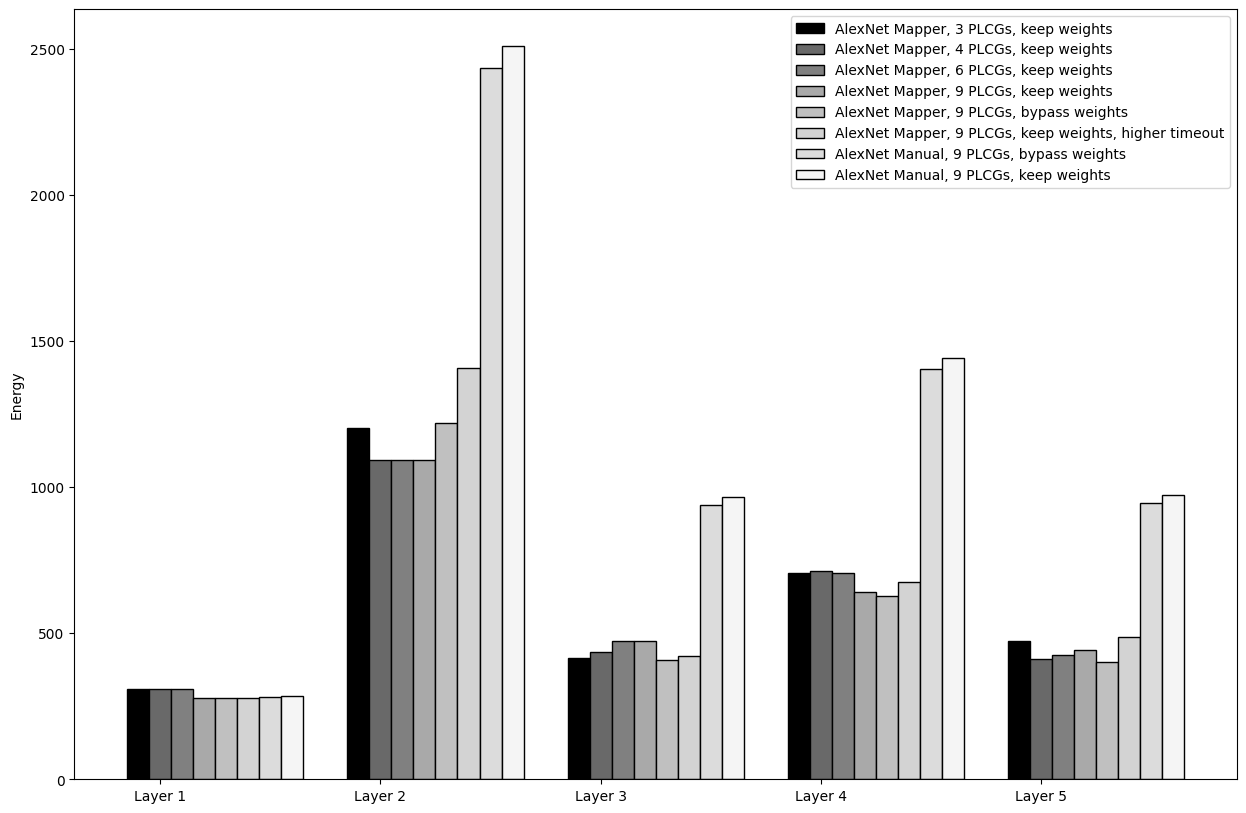

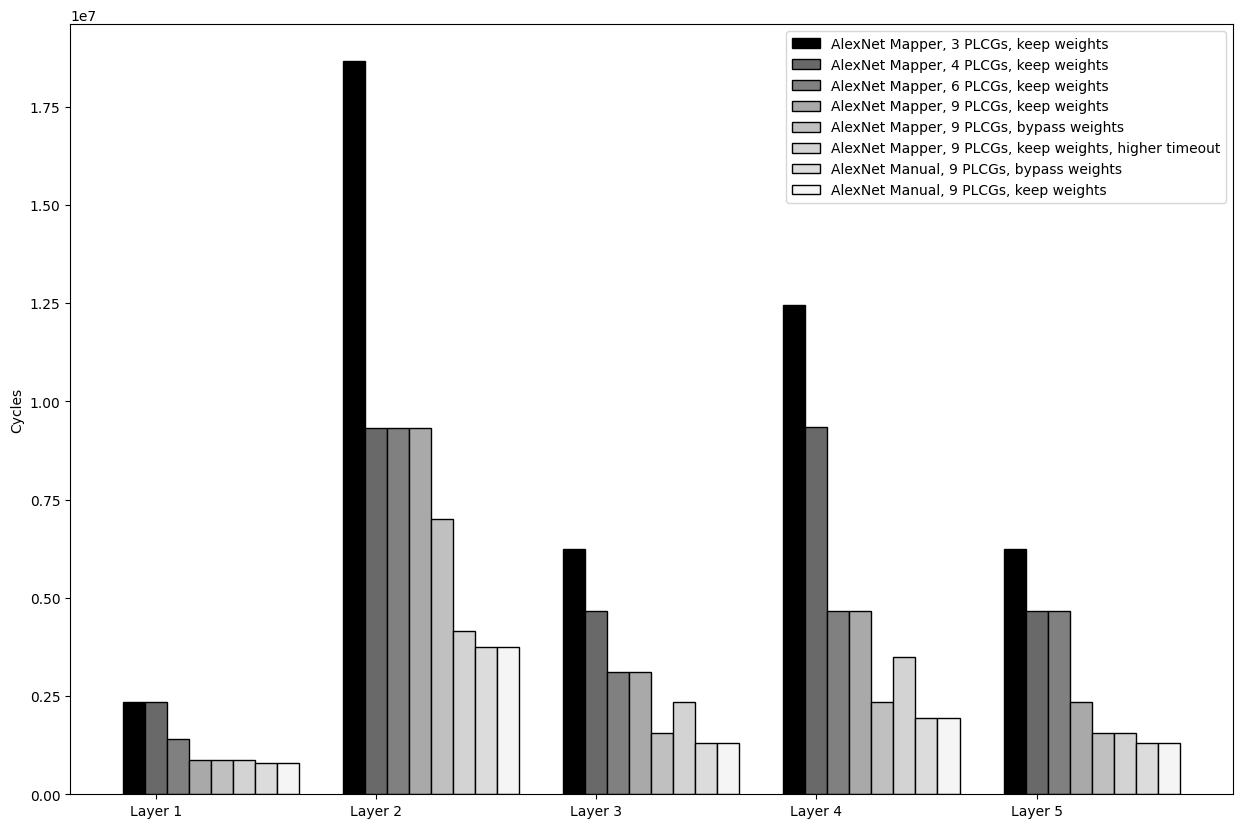

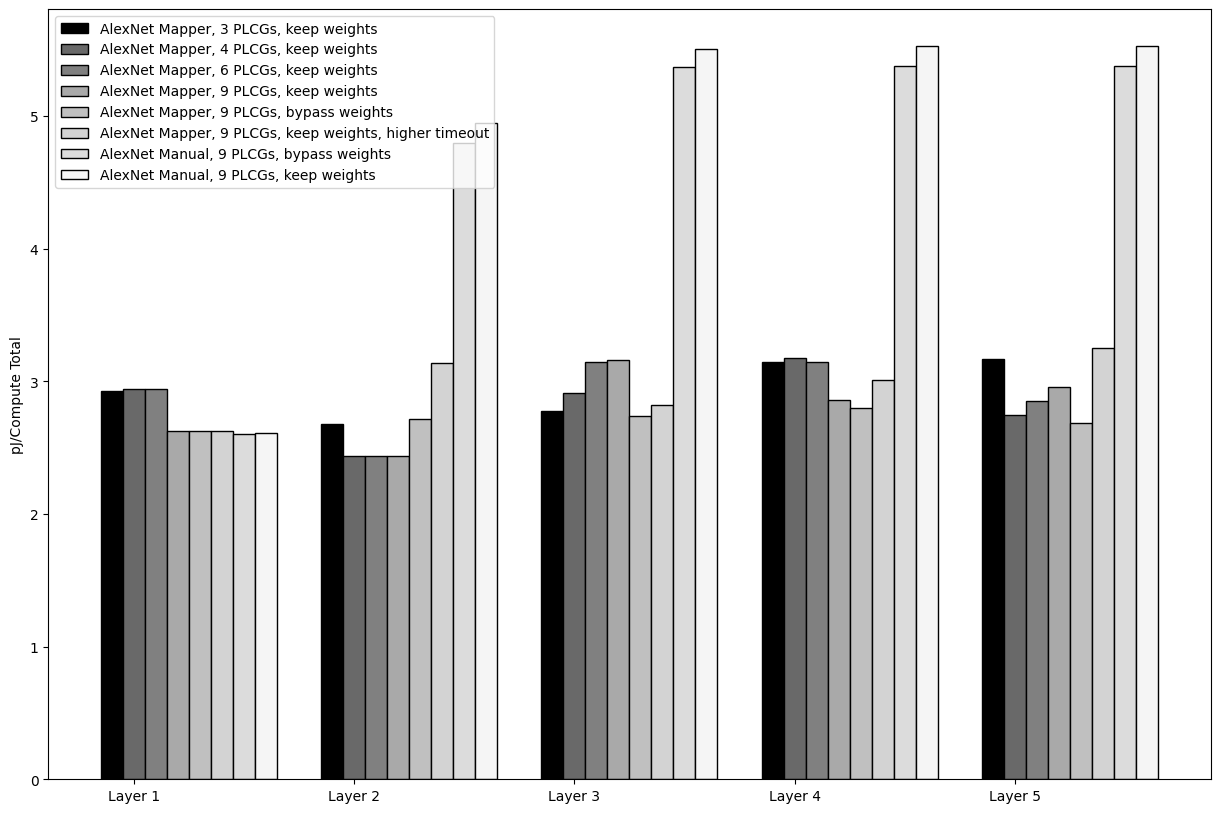

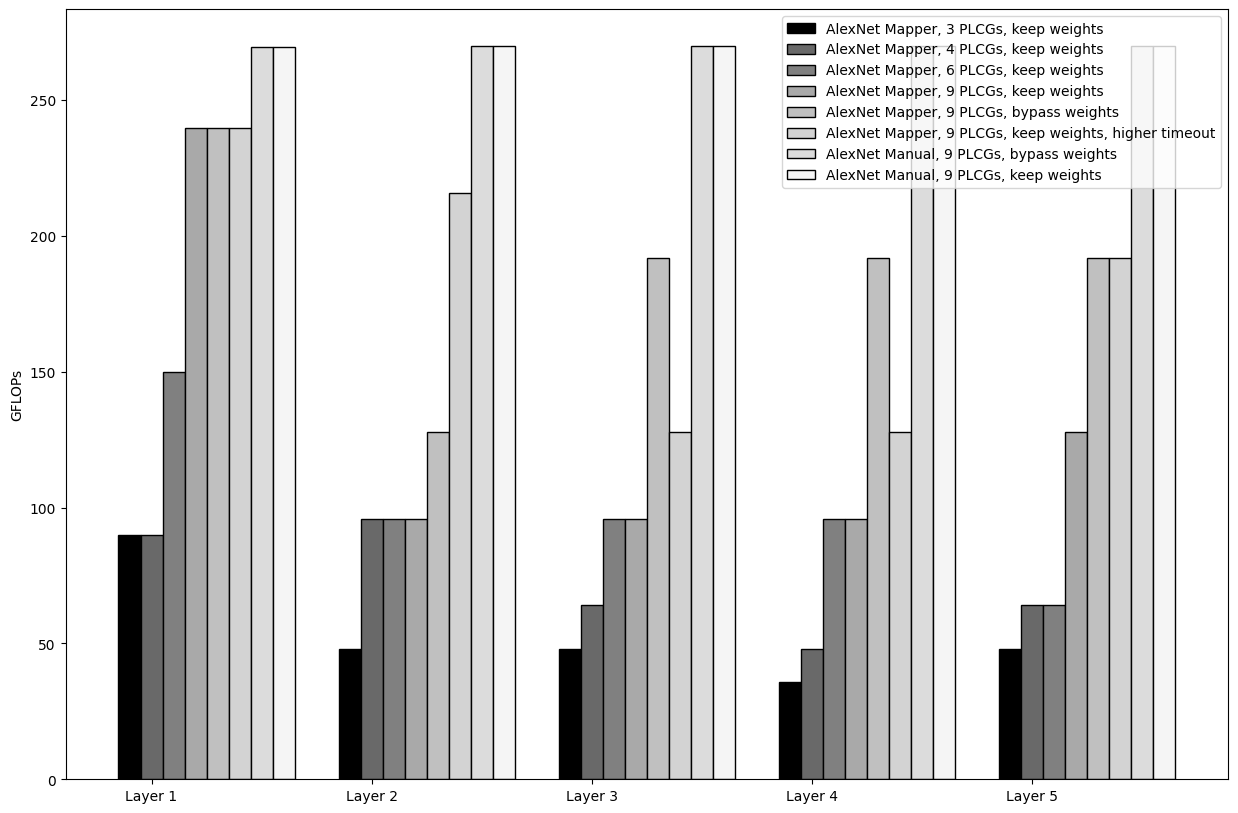

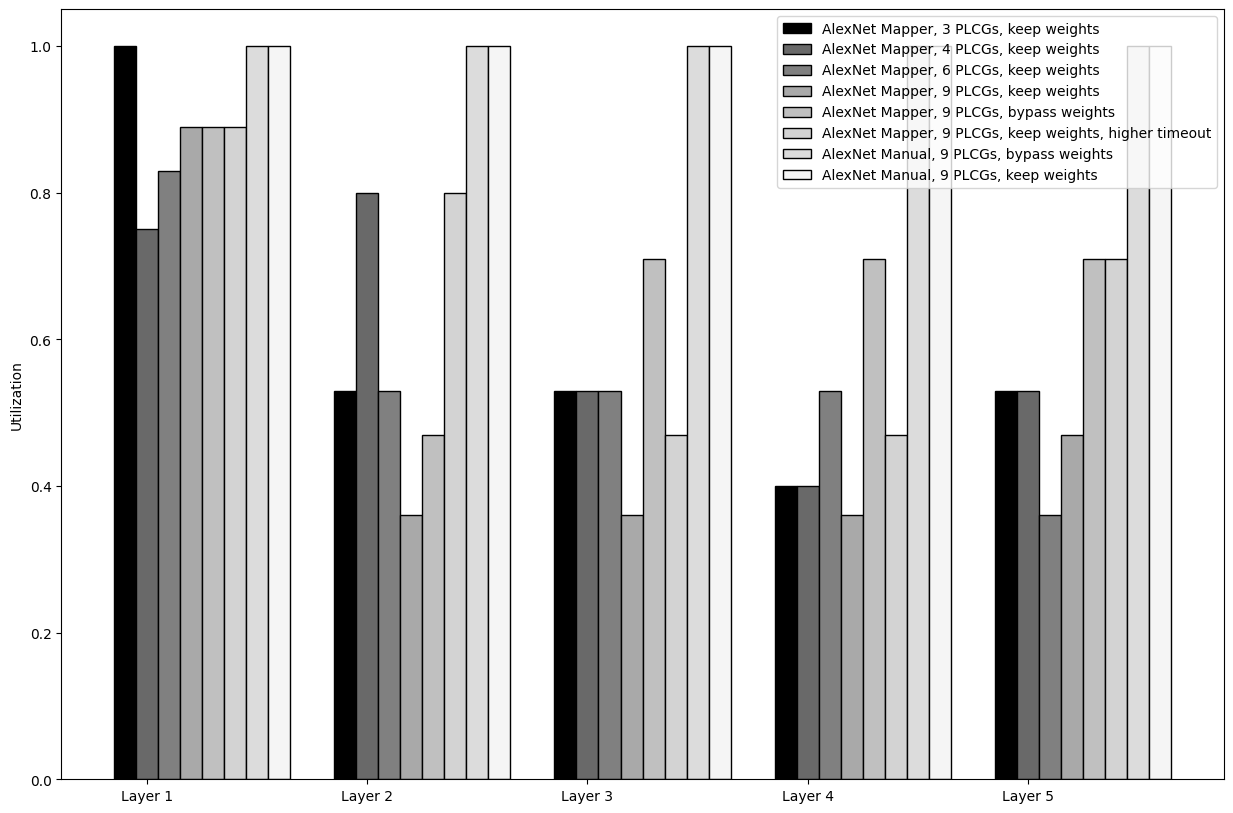

In [25]:
alexnet_mapper_3_keep = load_data('../results/alexnet/mapper/3_keep/stats.pkl')
alexnet_mapper_4_keep = load_data('../results/alexnet/mapper/4_keep/stats.pkl')
alexnet_mapper_6_keep = load_data('../results/alexnet/mapper/6_keep/stats.pkl')
alexnet_mapper_9_keep = load_data('../results/alexnet/mapper/9_keep/stats.pkl')
alexnet_mapper_9_bypass = load_data('../results/alexnet/mapper/9_bypass/stats.pkl')
alexnet_mapper_9_keep_highertimeout = load_data('../results/alexnet/mapper/9_keep_highertimeout/stats.pkl')
alexnet_manual_9_bypass = load_data('../results/alexnet/manual/9_bypass/stats.pkl')
alexnet_manual_9_keep = load_data('../results/alexnet/manual/9_keep/stats.pkl')

experiments = [
    alexnet_mapper_3_keep,
    alexnet_mapper_4_keep,
    alexnet_mapper_6_keep,
    alexnet_mapper_9_keep,
    alexnet_mapper_9_bypass,
    alexnet_mapper_9_keep_highertimeout,
    alexnet_manual_9_bypass,
    alexnet_manual_9_keep,
]

experiment_names = [
    'AlexNet Mapper, 3 PLCGs, keep weights', 
    'AlexNet Mapper, 4 PLCGs, keep weights', 
    'AlexNet Mapper, 6 PLCGs, keep weights', 
    'AlexNet Mapper, 9 PLCGs, keep weights',
    'AlexNet Mapper, 9 PLCGs, bypass weights',
    'AlexNet Mapper, 9 PLCGs, keep weights, higher timeout',
    'AlexNet Manual, 9 PLCGs, bypass weights',
    'AlexNet Manual, 9 PLCGs, keep weights',
]
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for category in categories:
    barplot(experiments, experiment_names, category)

In [ ]:
vgg16_mapper_9 = load_data('../results/vgg16/mapper/9/stats.pkl')
vgg16_manual_9 = load_data('../results/vgg16/manual/9/stats.pkl')

experiments = [vgg16_mapper_9, vgg16_manual_9]
experiment_names = ['VGG16 Mapper, 9 PLCGs', 'VGG16 Manual, 9 PLCGs']
categories = ['Energy', 'Cycles', 'pJ/Compute Total', 'GLOPs', 'Utilization']

for category in categories:
    barplot(experiments, experiment_names, category)